In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from IPython.display import Image


In [9]:
# Functions
def add_pic(pic_name):
    return Image(filename='/Users/paxton615/Github_Personal/Notes/Notes/pics/auto/'+ pic_name+'.png')  

In [27]:
url = 'https://www.autotrader.co.uk/car-search?sort=relevance&postcode=GU216DR&radius=1500&make=AUDI&model=Q2&year-to=2019&fuel-type=Petrol&page=1'
r = requests.get(url)

In [28]:
r.text[:1000]

'<!DOCTYPE html>\n<html>\n<head>\n\n    <meta name="gpt1" content="/323304435/web/cars/search/listings">\n\n    <meta name="gpt2" content="/323304435/web/cars/content/sponsored">\n\n\n<script>\n    var googletag = googletag || {};\n    googletag.cmd = googletag.cmd || [];\n</script>\n\n    <meta name="robots" content="follow,noindex"/>\n<meta name="decorator" content="blank"/>\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<script>\n    /*inline-script*/\n    var isiPad = navigator.userAgent.match(/iPad/i) != null;\n    if(isiPad) document.write(\'<meta name="viewport" content="user-scalable=yes, width=device-width"/>\');\n\n    window.isCarsOrVans = true\n\n</script><title>New & Used Cars for Sale - Auto Trader UK</title>\n\n<link rel="icon" href="/images/favicons/favicon.png?v=2"/>\n<link rel="apple-touch-icon" href="/images/favicons/touch-icon-iphone.png"/>\n<link rel="apple-touch-icon" sizes="76x76" href="/images/favicons/touch-icon-ipad.png"/>\n<link rel="apple-touch-ic

In [29]:
soup = BeautifulSoup(r.text, 'html.parser')

In [30]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="/323304435/web/cars/search/listings" name="gpt1"/>
  <meta content="/323304435/web/cars/content/sponsored" name="gpt2"/>
  <script>
   var googletag = googletag || {};
    googletag.cmd = googletag.cmd || [];
  </script>
  <meta content="follow,noindex" name="robots">
   <meta content="blank" name="decorator">
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <script>
     /*inline-script*/
    var isiPad = navigator.userAgent.match(/iPad/i) != null;
    if(isiPad) document.write('<meta name="viewport" content="user-scalable=yes, width=device-width"/>');

    window.isCarsOrVans = true
    </script>
    <title>
     New &amp; Used Cars for Sale - Auto Trader UK
    </title>
    <link href="/images/favicons/favicon.png?v=2" rel="icon"/>
    <link href="/images/favicons/touch-icon-iphone.png" rel="apple-touch-icon"/>
    <link href="/images/favicons/touch-icon-ipad.png" rel="apple-touch-icon" sizes="76x76"/>
    <link href="/im

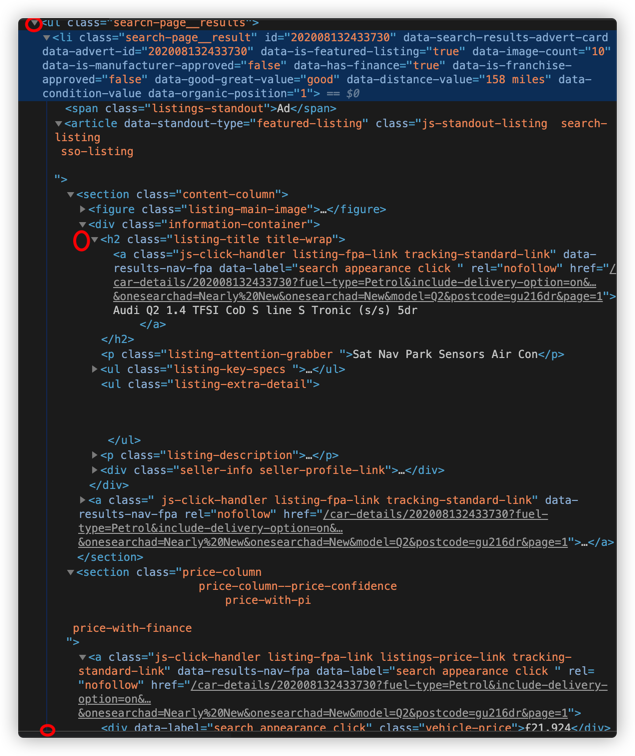

In [31]:
add_pic('auto1')

In [36]:
names = []
for tag in soup.find_all('li', class_='search-page__result'):
    for word in tag.find_all('h2', class_ = "listing-title title-wrap"):
        names.append(word.text.strip())

In [37]:
page1

['Audi Q2 1.4 TFSI CoD S line S Tronic (s/s) 5dr',
 'Audi Q2 Estate Black Edition 1.5 5dr',
 'Audi Q2 1.4 TFSI CoD Sport S Tronic (s/s) 5dr',
 'Audi Q2 1.4 T FSi S-Line 5dr',
 'Audi Q2 SE 1.0 TFSI 116 PS 6-speed 5dr',
 'Audi Q2 1.4 TFSI CoD S line (s/s) 5dr',
 'Audi Q2 1.4 TFSI CoD S line S Tronic (s/s) 5dr',
 'Audi Q2 TFSI SPORT 1.4 5dr',
 'Audi Q2 1.0 T FSi Sport 5dr',
 'Audi Q2 1.4 T FSi S-Line 5dr',
 'Audi Q2 1.4 T FSi S-Line 5dr']

In [39]:
prices=[]
for price in soup.find_all('div', 'vehicle-price'):
    prices.append(price.text)

In [40]:
prices

['£18,990',
 '£27,000',
 '£15,490',
 '£16,000',
 '£14,990',
 '£18,990',
 '£19,995',
 '£16,600',
 '£15,000',
 '£20,000',
 '£20,000']

In [49]:
names=[]
costs=[]
for n in range(1,49):
    url='https://www.autotrader.co.uk/car-search?sort=relevance&postcode=\
GU216DR&radius=1500&make=AUDI&model=Q2&year-to=2019&fuel-type=Petrol&page={}'.format(n)
    
    r = requests.get(url)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    for tag in soup.find_all('li', class_='search-page__result'):
        for word in tag.find_all('h2', class_ = "listing-title title-wrap"):
            names.append(word.text.strip())
    
    prices=[]
    for price in soup.find_all('div', 'vehicle-price'):
        costs.append(price.text)

In [51]:
len(names)

521

In [52]:
len(costs)

521

In [68]:
price_num = [int(i[1:3]+i[4:7]) for i in costs]

In [64]:
costs[0][1:3]+costs[0][4:7]

'18990'

In [66]:
costs[0]

'£18,990'

In [72]:
np.mean(price_num)

20062.737044145873

In [75]:
q2 = pd.DataFrame(columns=['types','prices'])

In [76]:
q2.types = names
q2.prices = price_num

In [78]:
q2.head(20)

,types,prices
0,Audi Q2 1.4 TFSI CoD S line S Tronic (s/s) 5dr,18990
1,Audi Q2 Estate Black Edition 1.5 5dr,27000
2,Audi Q2 1.4 TFSI CoD Sport S Tronic (s/s) 5dr,15490
3,Audi Q2 1.4 T FSi S-Line 5dr,16000
4,Audi Q2 SE 1.0 TFSI 116 PS 6-speed 5dr,14990
5,Audi Q2 1.4 TFSI CoD S line (s/s) 5dr,18990
6,Audi Q2 1.4 TFSI CoD S line S Tronic (s/s) 5dr,19995
7,Audi Q2 TFSI SPORT 1.4 5dr,16600
8,Audi Q2 1.0 T FSi Sport 5dr,15000
9,Audi Q2 1.4 T FSi S-Line 5dr,20000


In [80]:
q2.types[0][8:]

'1.4 TFSI CoD S line S Tronic (s/s) 5dr'

In [81]:
q2.types = [i[8:] for i in q2.types]

In [82]:
q2.head(20)

,types,prices
0,1.4 TFSI CoD S line S Tronic (s/s) 5dr,18990
1,Estate Black Edition 1.5 5dr,27000
2,1.4 TFSI CoD Sport S Tronic (s/s) 5dr,15490
3,1.4 T FSi S-Line 5dr,16000
4,SE 1.0 TFSI 116 PS 6-speed 5dr,14990
5,1.4 TFSI CoD S line (s/s) 5dr,18990
6,1.4 TFSI CoD S line S Tronic (s/s) 5dr,19995
7,TFSI SPORT 1.4 5dr,16600
8,1.0 T FSi Sport 5dr,15000
9,1.4 T FSi S-Line 5dr,20000


In [86]:
q2_1d4 = q2[q2['types'].str.contains('1.4')]

In [89]:
print('q2_1d4 mean:', q2_1d4.prices.mean())
pring

mean: 19180.650485436894
